## Correlation

#### Guess the correlation
On the right, use the scatterplot to estimate what the correlation is between the variables x and y. Once you've guessed it correctly, use the New Plot button to try out a few more scatterplots. When you're ready, answer the question below to continue to the next exercise.

Which of the following statements is NOT true about correlation?

a.If the correlation between x and y has a high magnitude, the data points will be clustered closely around a line.<br>
b.Correlation can be written as r.<br>
c.If x and y are negatively correlated, values of y decrease as values of x increase.<br>
<strong>d.Correlation cannot be 0.</strong>

#### Relationships between variables
In this chapter, you'll be working with a dataset world_happiness containing results from the 2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In this exercise, you'll examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) both visually and quantitatively. seaborn as sns, matplotlib.pyplot as plt, and pandas as pd are loaded and world_happiness is available.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

   Unnamed: 0      country  social_support  freedom  corruption  generosity  \
0           1      Finland             2.0      5.0         4.0        47.0   
1           2      Denmark             4.0      6.0         3.0        22.0   
2           3       Norway             3.0      3.0         8.0        11.0   
3           4      Iceland             1.0      7.0        45.0         3.0   
4           5  Netherlands            15.0     19.0        12.0         7.0   

   gdp_per_cap  life_exp  happiness_score  
0        42400      81.8              155  
1        48300      81.0              154  
2        66300      82.6              153  
3        47900      83.0              152  
4        50500      81.8              151  


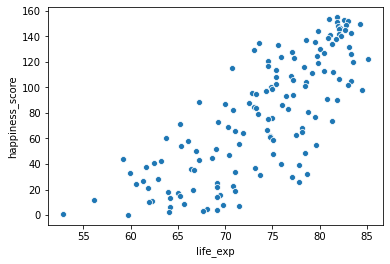

In [22]:
world_happiness = pd.read_csv("world_happiness.csv")
print(world_happiness.head())

# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x = "life_exp", y = "happiness_score", data = world_happiness)

# Show plot
plt.show()

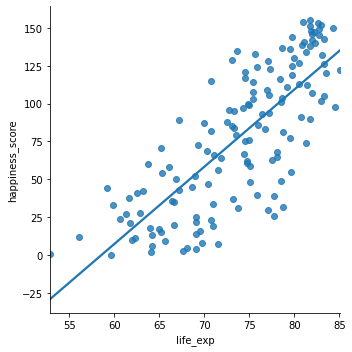

In [16]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x = "life_exp", y = "happiness_score", data = world_happiness, ci = None)

# Show plot
plt.show()

<strong>Question</strong><br>
Based on the scatterplot, which is most likely the correlation between life_exp and happiness_score?

a.0.3

b.-0.3

<strong>c.0.8</strong>

d.-0.8

In [17]:
world_happiness["life_exp"].corr(world_happiness["happiness_score"])

0.7802249053272062

Vibrant visualizations! Scatterplots with trendlines are a great way to verify that a relationship between two variables is indeed linear.

## Correlation caveats

#### What can't correlation measure?
While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

pandas as pd, matplotlib.pyplot as plt, and seaborn as sns are imported, and world_happiness is loaded.

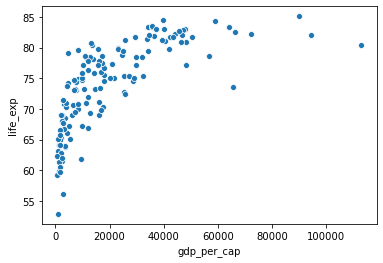

In [18]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x = "gdp_per_cap", y = "life_exp", data = world_happiness)

# Show plot
plt.show()

In [19]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness["gdp_per_cap"].corr(world_happiness["life_exp"])

print("Corr:",cor)

Corr: 0.7019547642148012


#### Question
The correlation between GDP per capita and life expectancy is 0.7. Why is correlation not the best way to measure the relationship between these two variables?

a.Correlation measures how one variable affects another.<br>
<strong>b.Correlation only measures linear relationships.</strong><br>
c.Correlation cannot properly measure relationships between numeric variables.

#### Transforming variables
When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.

pandas as pd, numpy as np, matplotlib.pyplot as plt, and seaborn as sns are imported, and world_happiness is loaded.

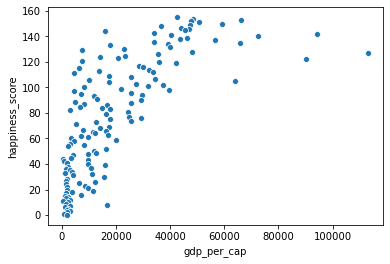

Corr: 0.727973301222298


In [20]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x = "gdp_per_cap", y = "happiness_score", data = world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness["gdp_per_cap"].corr(world_happiness["happiness_score"])
print("Corr:",cor)

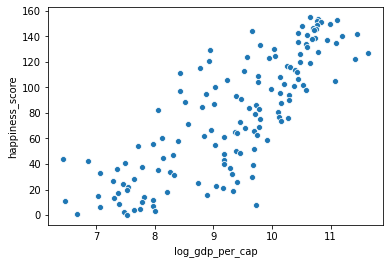

Corr: 0.8043146004918288


In [21]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness["gdp_per_cap"])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x = "log_gdp_per_cap",y = "happiness_score",data = world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness["log_gdp_per_cap"].corr(world_happiness["happiness_score"])
print("Corr:",cor)

#### Does sugar improve happiness?
A new column has been added to world_happiness called grams_sugar_per_day, which contains the average amount of sugar eaten per person per day in each country. In this exercise, you'll examine the effect of a country's average sugar consumption on its happiness score.

pandas as pd, matplotlib.pyplot as plt, and seaborn as sns are imported, and world_happiness is loaded.

In [23]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x = "grams_sugar_per_day", y = "happiness_score", data = world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness["grams_sugar_per_day"].corr(world_happiness["happiness_score"])
print(cor) #0.69 ÇIKTI

######################## HATA VERİYOR ÇÜNKÜ "grams_sugar_per_day" SÜTUNU YOK#########################

ValueError: Could not interpret input 'grams_sugar_per_day'

<strong>Question</strong>
Based on this data, which statement about sugar consumption and happiness scores is true?

a.Increased sugar consumption leads to a higher happiness score.<br>
b.Lower sugar consumption results in a lower happiness score<br>
<strong>c.Increased sugar consumption is associated with a higher happiness score.</strong><br>
d.Sugar consumption is not related to happiness.

Nice interpretation of correlation! If correlation always implied that one thing causes another, people may do some nonsensical things, like eat more sugar to be happier.

#### Confounders
A study is investigating the relationship between neighborhood residence and lung capacity. Researchers measure the lung capacity of thirty people from neighborhood A, which is located near a highway, and thirty people from neighborhood B, which is not near a highway. Both groups have similar smoking habits and a similar gender breakdown.

Which of the following could be a confounder in this study?

a.Lung capacity

b.Neighborhood

<strong>c.Air pollution</strong>

d.Smoking status

e.Gender


Correct! You would expect there to be more air pollution in the neighborhood situated near the highway, which can cause lower lung capacity.

## Design of experiments

#### Study types
While controlled experiments are ideal, many situations and research questions are not conducive to a controlled experiment. In a controlled experiment, causation can likely be inferred if the control and test groups have similar characteristics and don't have any systematic difference between them. On the other hand, causation cannot usually be inferred from observational studies, whose results are often misinterpreted as a result.

In this exercise, you'll practice distinguishing controlled experiments from observational studies.

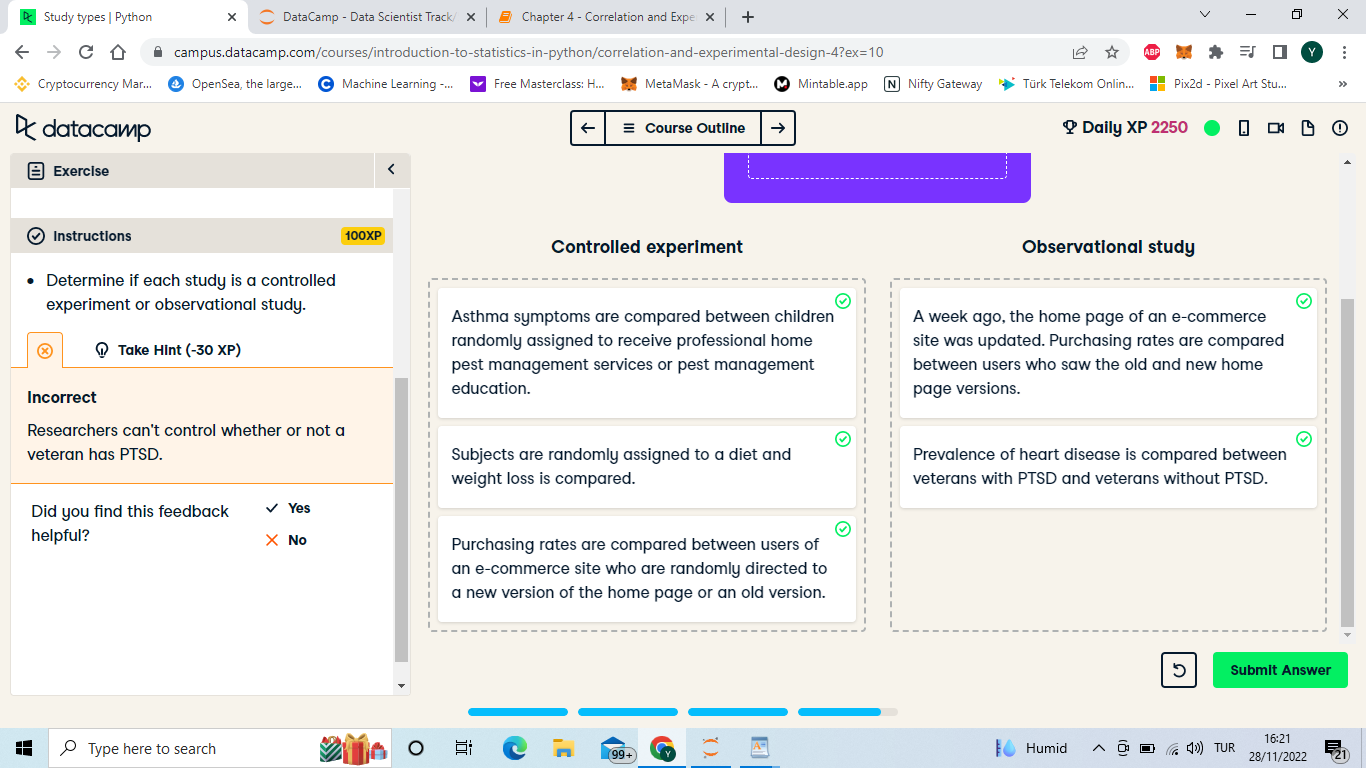

<strong>Question : Longitudinal vs. cross-sectional studies</strong><br>

A company manufactures thermometers, and they want to study the relationship between a thermometer's age and its accuracy. To do this, they take a sample of 100 different thermometers of different ages and test how accurate they are. Is this data longitudinal or cross-sectional?

a.Longitudinal

<strong>b.Cross-sectional</strong>

c.Both

d.Neither

Perfect! This is a cross-sectional study since researchers aren't following the same set of thermometers over time and repeatedly measuring their accuracy at different ages.